In [1]:
# Import necessary modules and functions
import pandas as pd
import sys
import pandas as pd
import matplotlib.pyplot as plt
import os
sys.path.append('../scripts')
import Preprocessing as dp


In [2]:
#load Dataset
df = pd.read_csv("../data/GOOG_historical_data.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0


In [3]:
df.shape

(5020, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5020 non-null   object 
 1   Open          5020 non-null   float64
 2   High          5020 non-null   float64
 3   Low           5020 non-null   float64
 4   Close         5020 non-null   float64
 5   Adj Close     5020 non-null   float64
 6   Volume        5020 non-null   int64  
 7   Dividends     5020 non-null   float64
 8   Stock Splits  5020 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 353.1+ KB


In [5]:
df.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [6]:
df.value_counts()

Date        Open        High        Low         Close       Adj Close   Volume     Dividends  Stock Splits
2004-08-19  2.490664    2.591785    2.390042    2.499133    2.496292    897427216  0.0        0.0             1
2017-11-29  52.133999   52.203999   50.782501   51.083000   51.024937   49188000   0.0        0.0             1
2017-12-08  51.874500   52.102501   51.626099   51.852501   51.793564   25816000   0.0        0.0             1
2017-12-07  51.021500   51.712002   50.903549   51.546501   51.487911   29164000   0.0        0.0             1
2017-12-06  50.075001   51.248501   50.056999   50.918999   50.861122   25440000   0.0        0.0             1
                                                                                                             ..
2011-04-08  14.567647   14.567647   14.397535   14.400025   14.383657   76357137   0.0        0.0             1
2011-04-07  14.339502   14.461794   14.301146   14.445853   14.429433   101639547  0.0        0.0            

In [7]:
# Calculate summary statistics
dp.summary_statistics(df)


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5.020000e+03,5020.000000,5020.000000
mean,45.251315,45.728793,44.800587,45.274515,45.224493,1.157539e+08,0.000040,0.004583
std,43.338635,43.818298,42.918167,43.377299,43.332534,1.497936e+08,0.002823,0.284034
min,2.470490,2.534002,2.390042,2.490913,2.488082,1.584340e+05,0.000000,0.000000
25%,13.034705,13.145415,12.881592,13.032090,13.017277,2.733950e+07,0.000000,0.000000
50%,26.982210,27.194902,26.791387,27.005927,26.975230,5.585480e+07,0.000000,0.000000
75%,60.215126,60.758375,59.811811,60.280252,60.211734,1.425333e+08,0.000000,0.000000
max,191.750000,193.309998,190.619995,192.660004,192.660004,1.650833e+09,0.200000,20.000000


In [8]:
# Check for missing values
dp.check_missing_values(df)

Missing Values:
 Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [9]:
# Convert 'Date' column to datetime and set it as index
df = dp.convert_date(df)
df.head()


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0


In [10]:
# Calculate technical indicators
df = dp.calculate_technical_indicators(df)
df.head(60)


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,RSI,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-26,2.613952,2.688672,2.606729,2.687676,2.684621,142572401,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-27,2.692408,2.705360,2.632383,2.643840,2.640835,124826132,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-30,2.622171,2.627402,2.540727,2.540727,2.537839,104429967,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-31,2.547950,2.583068,2.544463,2.549693,2.546795,98825037,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


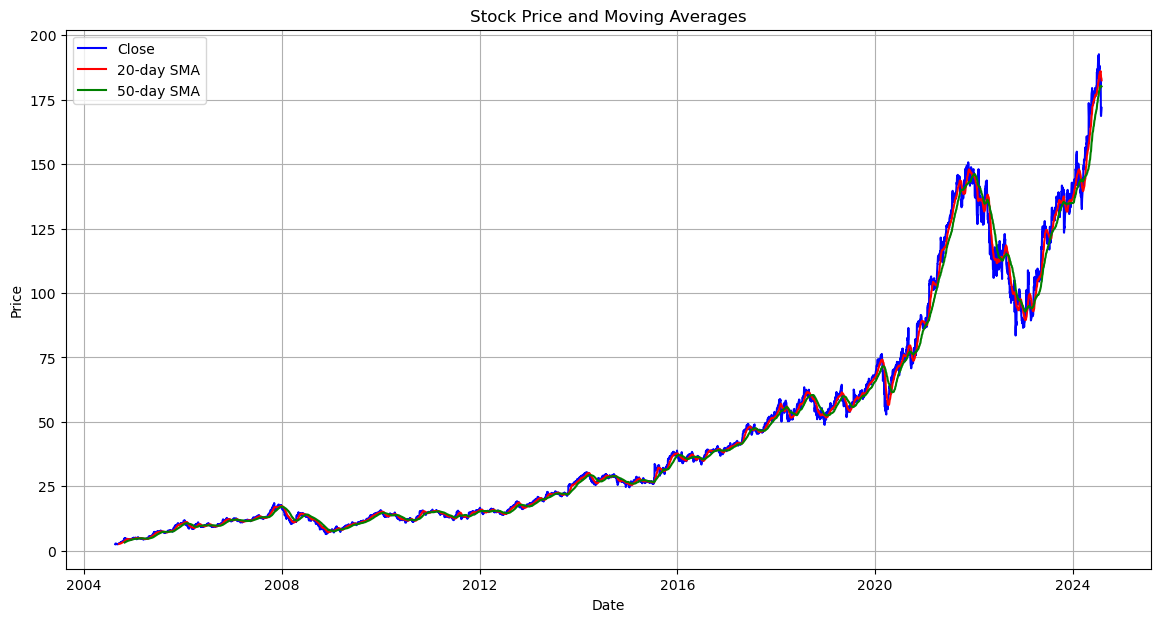

In [11]:
# Plot stock data with Moving Averages
dp.plot_stock_data(df)


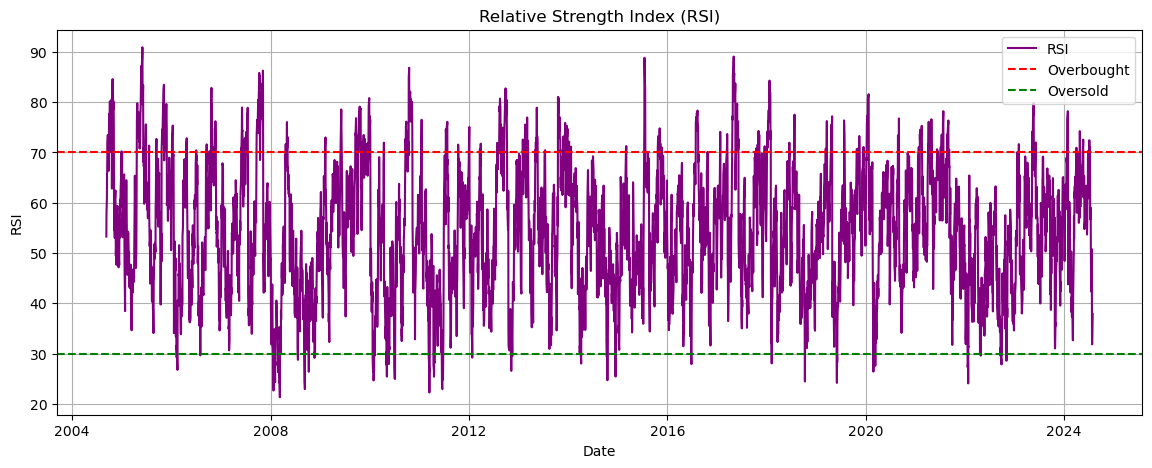

In [12]:
# Plot Relative Strength Index (RSI)
dp.plot_rsi(df)


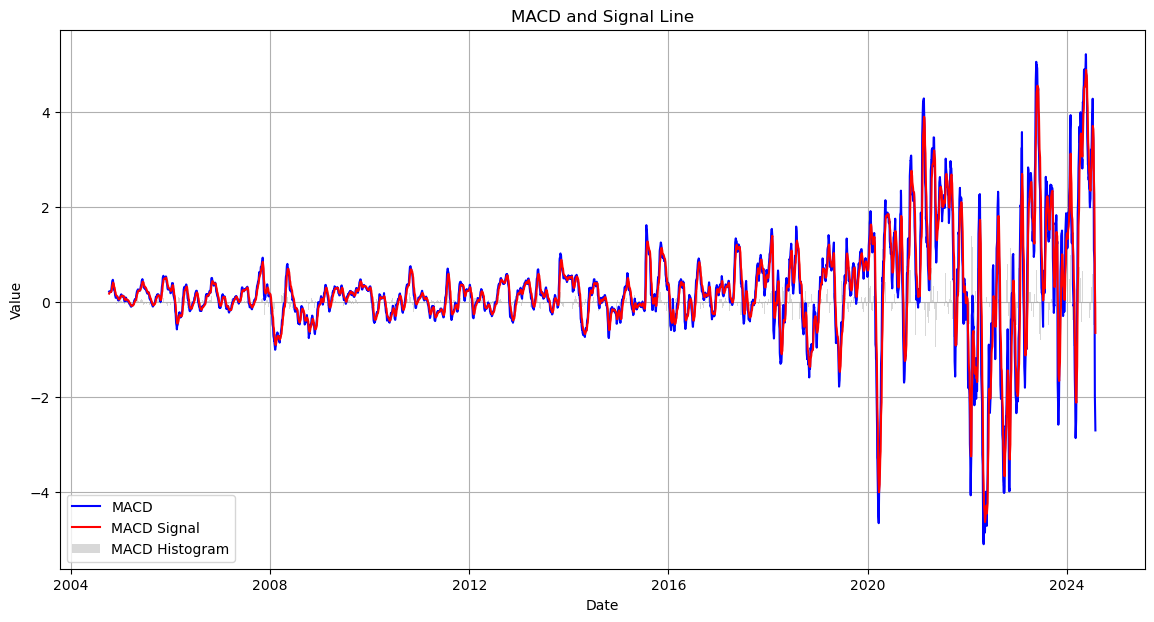

In [13]:
# Plot Moving Average Convergence Divergence (MACD)
dp.plot_macd(df)


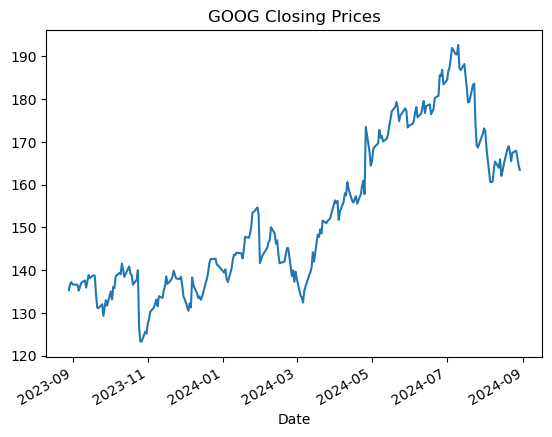

In [14]:
# Fetch historical stock data using yfinance
historical_data = dp.fetch_stock_data('GOOG')
historical_data['Close'].plot(title='GOOG Closing Prices')
plt.show()


In [15]:
# Calculate and print financial metrics
ticker = 'GOOG'
metrics = dp.financial_metrics(ticker)
print("Financial Metrics:\n", metrics)

Financial Metrics:
 {'PE_Ratio': 1.0, 'Market_Cap': 2001342693376, 'Dividend_Yield': 0.0049}
